# Store

The metadata stored encompasses information such as city, state, type, and cluster, where a cluster refers to a grouping of similar stores.

In [1]:
# libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
sns.set(rc={"figure.figsize":(12,12)}) 

In [2]:
store_df = pd.read_csv("./data/raw/stores.csv")
sales_df = pd.read_csv("./data/processed/sales_oil_df.csv")

In [3]:
store_df.head(20)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [4]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


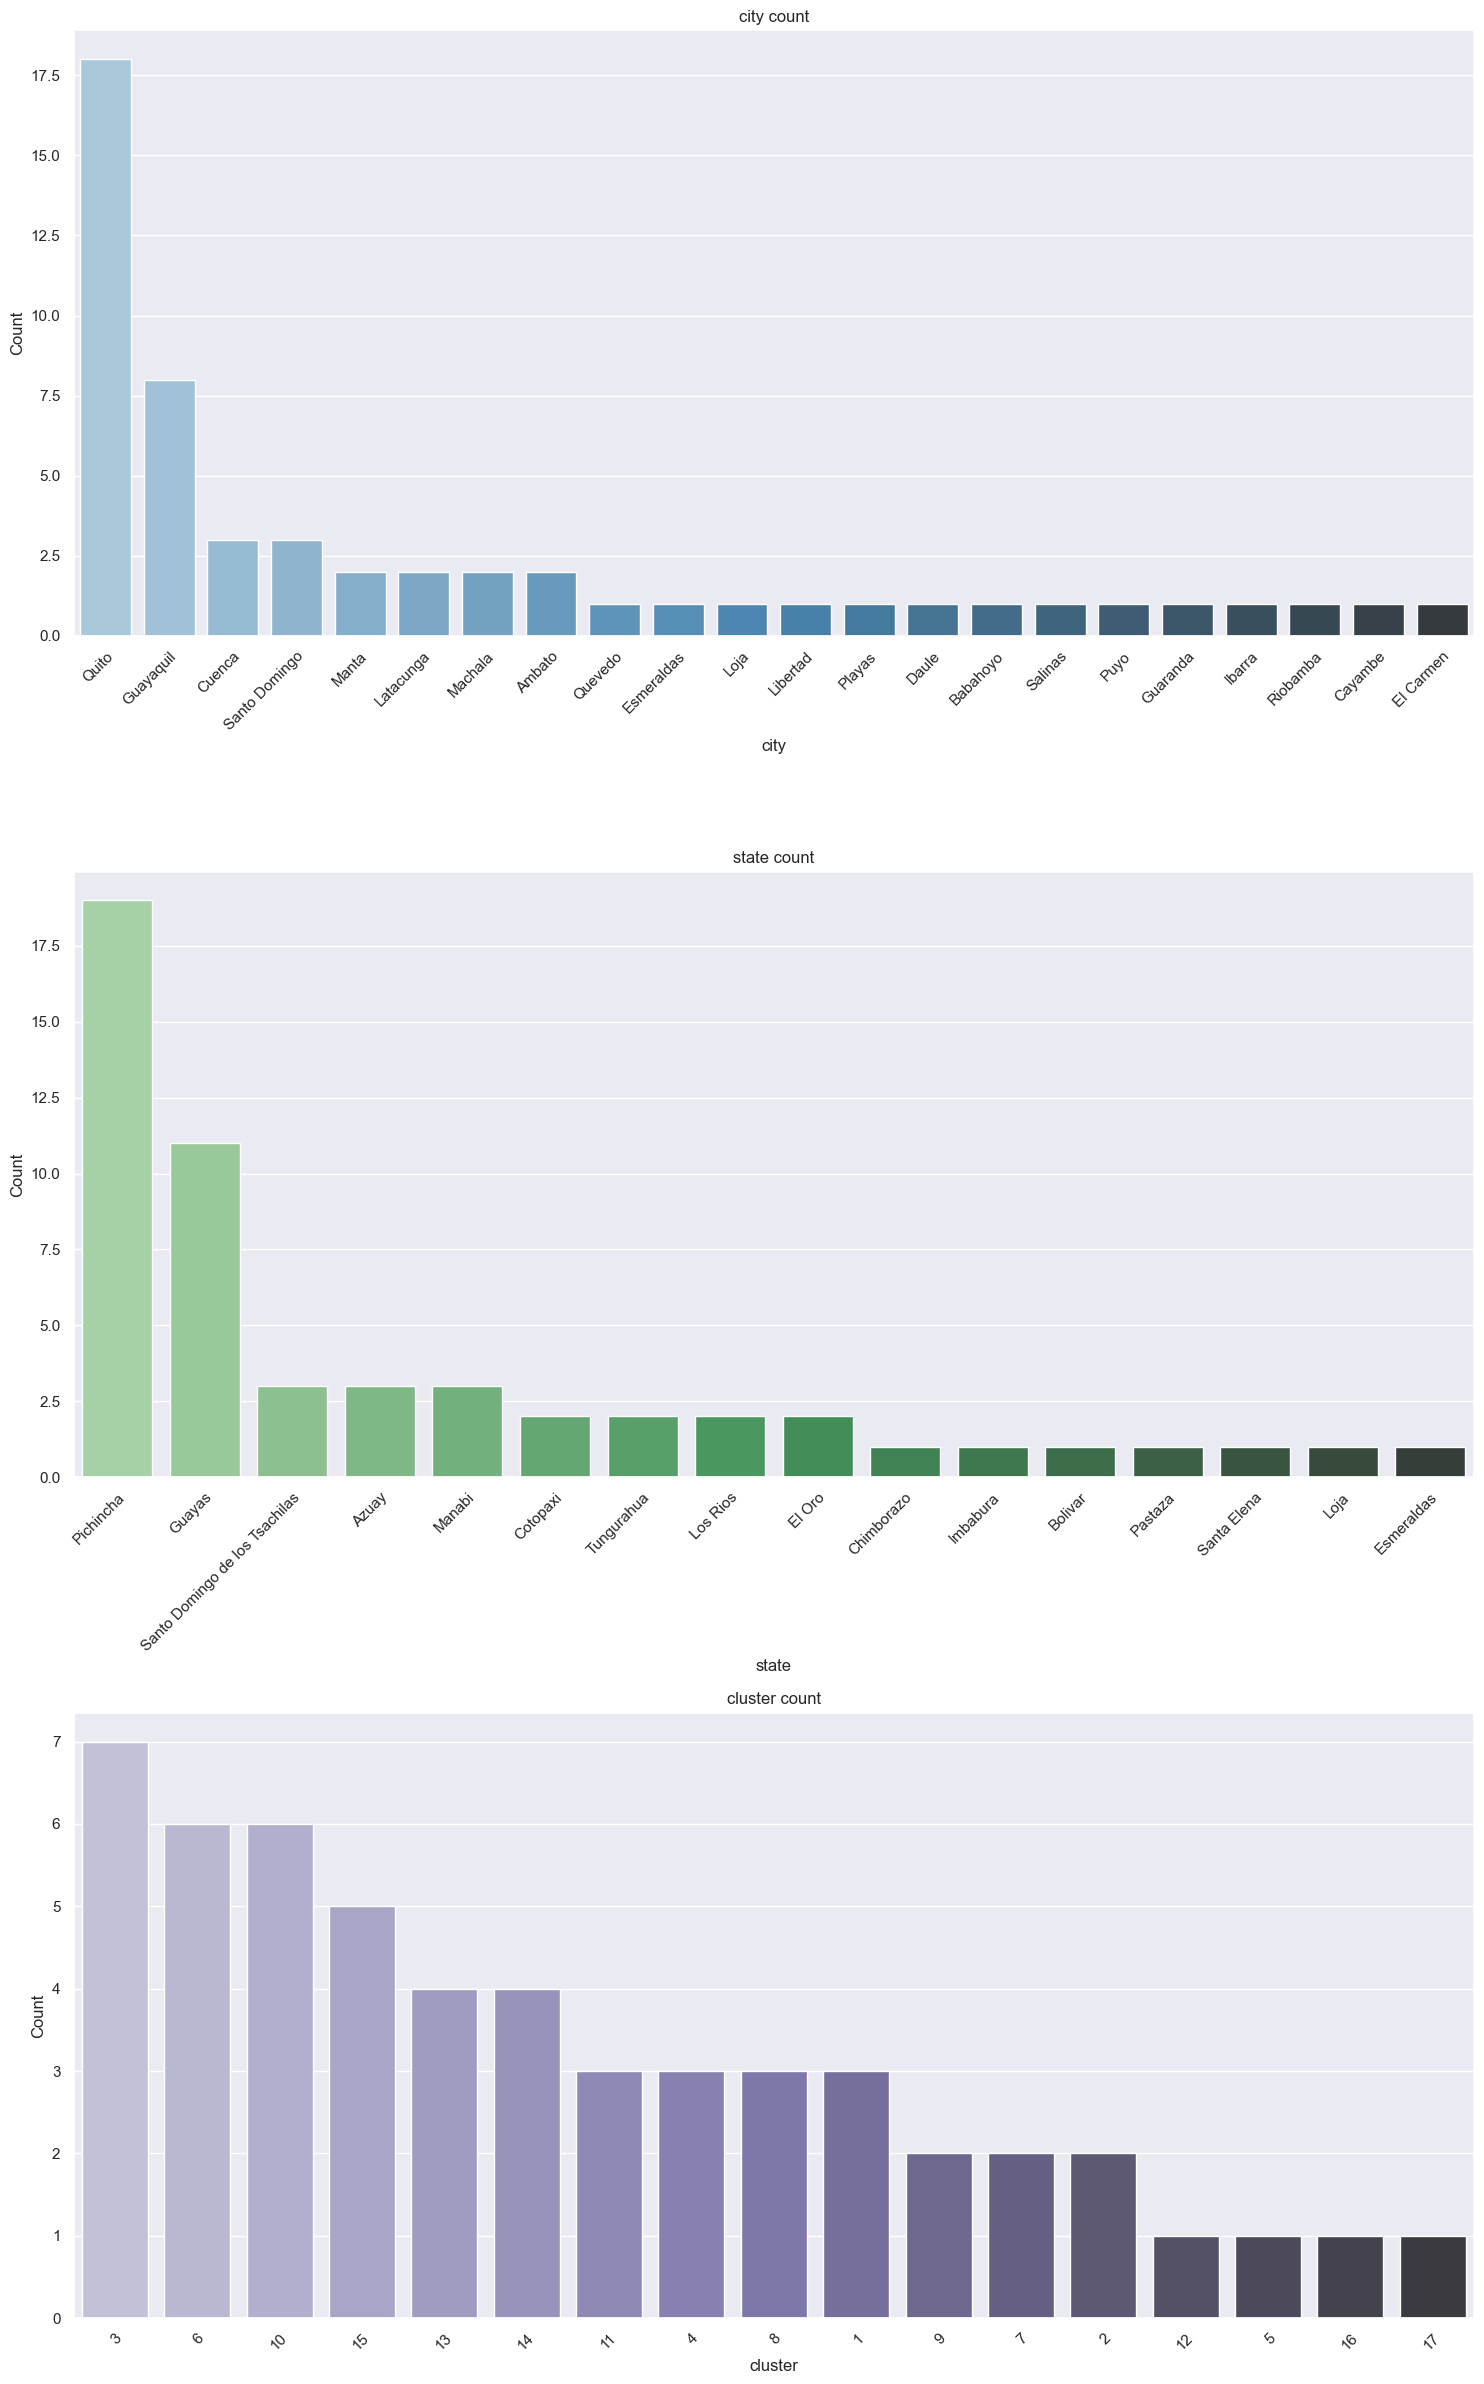

In [5]:
columns = ["city", "state", "cluster"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (15,3*8))
sets = ["Blues_d","Greens_d", "Purples_d", "PuBuGn", "PuBu"]

for i, col in enumerate(columns):
    sns.countplot(store_df[col], order=store_df[col].value_counts(ascending=False).index, palette = sets[i], ax=axes[i])
    axes[i].set_title(f'{col} count')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')
    # axes[i].tick_params(axis='x', rotation=45, rotation_mode='anchor')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()

In [6]:
def check_stores(feature):
    groped_stores = store_df.groupby(feature)["store_nbr"].apply(list)

    for feature, numbers in groped_stores.items():
        print(f'Type: {feature}, Store Numbers: {numbers}')
    print("\n")

In [7]:
check_stores_columns = ["type", "cluster", "city"]
for col in check_stores_columns:
    check_stores(col)

Type: A, Store Numbers: [44, 45, 46, 47, 48, 49, 50, 51, 52]
Type: B, Store Numbers: [9, 11, 18, 20, 21, 31, 34, 39]
Type: C, Store Numbers: [10, 12, 13, 14, 15, 16, 17, 19, 22, 30, 32, 33, 35, 40, 54]
Type: D, Store Numbers: [1, 2, 3, 4, 5, 6, 7, 8, 23, 24, 25, 26, 27, 37, 38, 41, 42, 53]
Type: E, Store Numbers: [28, 29, 36, 43]


Type: 1, Store Numbers: [24, 25, 27]
Type: 2, Store Numbers: [37, 42]
Type: 3, Store Numbers: [16, 30, 32, 33, 35, 40, 54]
Type: 4, Store Numbers: [5, 38, 41]
Type: 5, Store Numbers: [44]
Type: 6, Store Numbers: [9, 11, 20, 21, 34, 39]
Type: 7, Store Numbers: [14, 22]
Type: 8, Store Numbers: [3, 7, 8]
Type: 9, Store Numbers: [4, 23]
Type: 10, Store Numbers: [26, 28, 29, 31, 36, 43]
Type: 11, Store Numbers: [45, 49, 52]
Type: 12, Store Numbers: [17]
Type: 13, Store Numbers: [1, 2, 6, 53]
Type: 14, Store Numbers: [46, 47, 48, 50]
Type: 15, Store Numbers: [10, 12, 13, 15, 19]
Type: 16, Store Numbers: [18]
Type: 17, Store Numbers: [51]


Type: Ambato, Store Numb

### Notes About Ecuador
Playas, located in the province of Guayas, Ecuador, is a coastal city heavily reliant on tourism. The area boasts numerous hotels and resorts, contributing to its economic landscape.<br>

Guayaquil, Ecuador's largest city, serves as the nation's economic capital and primary port. Its economic prominence dates back to both colonial and republic periods.<br>

Ecuador's economy historically relied on primary industries such as agriculture, petroleum, and aquaculture. Between 2006 and 2014, GDP growth averaged 4.3%, fueled by high oil prices and external financing. In May 2017, former president Lenín Moreno initiated a substantial transformation of Ecuador's economy, aiming to enhance the private sector's influence, particularly in the oil industry.<br>


### Insights
The data reveals that the majority of stores are situated in Quito and Guayaquil. Surprisingly, the stores with the highest sales are located in Playas (35th store) and Guayail (24th and 26th stores). Despite Quito being the capital of Ecuador, it does not hold the top spot in terms of sales.<br>

Upon examining the clusters, it becomes apparent that the stores with the highest sales are not grouped together, nor are the ones with the lowest sales. Although the explanation of how these clusters are representative is lacking, it is evident that they do not accurately reflect the stores based on their sales.

In [47]:
merged_df = sales_df.merge(store_df, on="store_nbr", how="left")

In [48]:
# save the dataframe
merged_df.to_csv('./data/processed/sales_store_oil_df.csv', index=False)